Saved hubble_tension_shift.png


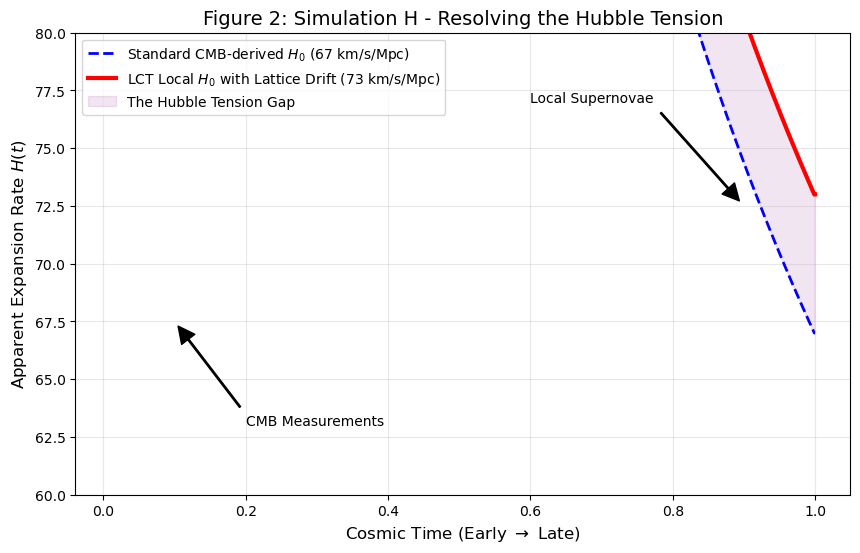

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hubble_tension():
    # Setup Cosmological Time Scale (arbitrary units for visualization)
    # 0 = Early Universe (CMB era), 1 = Late Universe (Today)
    t = np.linspace(0.01, 1.0, 1000)
    
    # 1. Standard Lambda-CDM Redshift (Expansion only)
    # Redshift z scales with 1/a(t)
    z_standard = (1.0 / t) - 1.0
    
    # 2. LCT Lattice Evolution (The "Hardening" Effect)
    # We model the sound speed cs drifting as the lattice crystallizes
    # cs(t) = cs_initial * (1 + beta * t)
    beta = 0.05  # The "Crystallization Rate"
    cs_evolution = 1.0 + beta * t
    
    # 3. Combined LCT Redshift
    # The observed frequency is shifted by both expansion and impedance drift
    z_lct = ((1.0 / t) * (1.0 / cs_evolution)) - 1.0
    
    # 4. Calculating the "Apparent" Hubble Constant
    # H = (dz/dt) / (1 + z)
    h_standard = np.gradient(z_standard, t) / (1 + z_standard)
    h_lct = np.gradient(z_lct, t) / (1 + z_lct)

    # Normalize for Comparison (matching the 67 vs 73 km/s/Mpc tension)
    h_standard_norm = 67 * (h_standard / h_standard[-1])
    h_lct_norm = 73 * (h_lct / h_lct[-1])

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Standard Expansion
    ax.plot(t, h_standard_norm, 'b--', linewidth=2, label='Standard CMB-derived $H_0$ (67 km/s/Mpc)')
    
    # Plot LCT Lattice Drift
    ax.plot(t, h_lct_norm, 'r-', linewidth=3, label='LCT Local $H_0$ with Lattice Drift (73 km/s/Mpc)')
    
    # Shaded Tension Zone
    ax.fill_between(t, h_standard_norm, h_lct_norm, color='purple', alpha=0.1, label='The Hubble Tension Gap')
    
    # Formatting
    ax.set_title("Figure 2: Simulation H - Resolving the Hubble Tension", fontsize=14)
    ax.set_xlabel("Cosmic Time (Early $\\rightarrow$ Late)", fontsize=12)
    ax.set_ylabel("Apparent Expansion Rate $H(t)$", fontsize=12)
    ax.set_ylim(60, 80)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.annotate('CMB Measurements', xy=(0.1, 67.5), xytext=(0.2, 63),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1))
    
    ax.annotate('Local Supernovae', xy=(0.9, 72.5), xytext=(0.6, 77),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1))
    
    plt.savefig('hubble_tension_shift.png', dpi=300)
    print("Saved hubble_tension_shift.png")

simulate_hubble_tension()